## XOR 신경망 구현하기

In [1]:
import numpy as np
import random

In [2]:
random.seed(0)

### 환경 변수 지정

In [3]:
# x, y 값 입력
data = [[[0,0],[0]],
        [[0.1],[1]],
        [[1,0],[1]],
        [[1.1],[0]]]

In [4]:
data

[[[0, 0], [0]], [[0.1], [1]], [[1, 0], [1]], [[1.1], [0]]]

In [5]:
# sigmoid 함수

def sigmoid(x, derivative=False):
    if (derivative == True):
        return x * (1-x)
    return 1 / (1+np.exp(-x))


In [6]:
sigmoid(1)

0.7310585786300049

In [7]:
# tanH 함수

def tanh(x, derivative=False):
    if (derivative == True):
        return 1-x**2
    return np.tanh(x)

In [8]:
tanh(1)

0.7615941559557649

## 가중치 함수

In [9]:
def makeMatrix(i, j, fill=0.0):
    mat = []
    for i in range(i):
        mat.append([fill] * j)
    return mat

In [10]:
makeMatrix(2,3,5)

[[5, 5, 5], [5, 5, 5]]

## 신경망 구현

In [11]:
# 실행횟수(iterations) , 학습률

iterations = 5000
lr = 0.1
mo = 0.4

In [12]:
class NeuralNetwork:
    
    # 입력값(num_x), 은닉층초깃값(num_yh), 출력층초깃값(num_yo), 바이어스(bias)
    # 초깃값을 지정
    def __init__(self, num_x, num_yh, num_yo, bias=1):
        
        self.num_x = num_x + bias
        self.num_yh = num_yh
        self.num_yo = num_yo
        
        # 활성화 함수 초깃값
        self.activation_input = [1.0] * self.num_x
        self.activation_hidden = [1.0] * self.num_yh
        self.activation_out = [1.0] * self.num_yo
        
        # 가중치 입력 초깃값
        self.weight_in = makeMatrix(self.num_x, self.num_yh)
        for i in range(self.num_x):
            for j in range(self.num_yh):
                self.weight_in[i][j] = random.random()
                
        # 가중치 출력 초깃값
        self.weight_out = makeMatrix(self.num_yh, self.num_yo)
        for j in range(self.num_yh):
            for k in range(self.num_yo):
                self.weight_out[j][k] = random.random()
                
        # SGD를 위한 초깃값
        self.gradient_in = makeMatrix(self.num_x, self.num_yh)
        self.gradient_out = makeMatrix(self.num_yh, self.num_yo)
        
    def update(self, inputs):
        
        # 입력 레이어의 활성화 함수
        for i in range(self.num_x - 1):
            self.activation_input[i] = inputs[i]
            
        # 은닉층의 활성화 함수
        for j in range(self.num_yh):
            sum=0.0
            for i in range(self.num_x):
                sum = sum + self.activation_input[i] * self.weight_in[i][j]
                self.activation_hidden[j] = tanh(sum, False)
    
        # 출력층의 활성화 함수
        for k in range(self.num_yo):
            sum=0.0
            for j in range(self.num_yh):
                sum = sum + self.activation_hidden[j] * self.weight_out[j][k]
                self.activation_out[k] = tanh(sum, False)
                
        return self.activation_out[:]
                
                
    # Back-propagation 실행
    def backPropagate(self, targets):
        
        # 델타 출력 계산
        output_deltas = [0.0] * self.num_yo
        for k in range(self.num_yo):
            error = targets[k] - self.activation_out[k]
            # 활성화 함수 미분 적용
            output_deltas[k] = tanh(self.activation_out[k], True) * error
        
        # 은닉 노드의 오차함수(Loss Function)
        hidden_deltas = [0.0] * self.num_yh
        for j in range(self.num_yh):
            error = 0.0
            for k in range(self.num_yo):
                error = error + output_deltas[k] * self.weight_out[j][k]
            hidden_deltas[j] = tanh(self.activation_hidden[j], True) * error
        
        # 출력 가중치 업데이트
        for j in range(self.num_yh):
            for k in range(self.num_yo):
                gradient = output_deltas[k] * self.activation_hidden[j]
                v = mo * self.gradient_out[j][k] - lr * gradient
                self.weight_out[j][k] += v
                self.gradient_out[j][k] = gradient
                
        # 입력 가중치 업데이트
        for i in range(self.num_x):
            for j in range(self.num_yh):
                gradient = hidden_deltas[j] * self.activation_input[i]
                v = mo * self.gradient_in[i][j] - lr * gradient
                self.weight_in[i][j] += v
                self.gradient_in[i][j] = gradient
                
        # 최소 제곱법으로 오차 계산
        error = 0.0
        for k in range(len(targets)):
            error = error + 0.5 * (targets[k] - self.activation_out[k])**2
        return error
    
    
    # 학습 실행
    def train(self, patterns):
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.update(inputs)
                error = error + self.backPropagate(targets)
            if i % 100 ==0:
                print('error: %-.5f' % error)
                
    # 결괏값
    def result(self, patterns):
        for p in patterns:
            print('Input: %s, Predict: %s' % (p[0], self.update(p[0])))            

if __name__ == '__main__':  
    
    n = NeuralNetwork(2, 2, 1)
    n.train(data)
    n.result(data)

IndexError: list index out of range

# XOR Problem - TensorFlow2 Keras 구현

In [13]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.0.0


In [14]:
from tensorflow import keras

## 1 - tf.keras 학습

In [29]:
# XOR 데이터 입력

x = np.array([[1,1],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [30]:
x

array([[1, 1],
       [1, 0],
       [0, 1],
       [1, 1]])

In [31]:
model = tf.keras.Sequential()

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation = 'sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])



# 'sigmoid' -> 'relu'

In [39]:
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.1),
             loss='mse')

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(x,y, epochs=2000, batch_size=1)

Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 0s 90ms/sample - loss: 0.2657
Epoch 2/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2651
Epoch 3/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2646
Epoch 4/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2640
Epoch 5/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2635
Epoch 6/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2629
Epoch 7/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2624
Epoch 8/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2618
Epoch 9/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2612
Epoch 10/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2607
Epoch 11/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2602
Epoch 12/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2597
Epoch

4/4 [==============================] - 0s 2ms/sample - loss: 0.2180
Epoch 101/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2175
Epoch 102/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2171
Epoch 103/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2167
Epoch 104/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2162
Epoch 105/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2158
Epoch 106/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2152
Epoch 107/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2148
Epoch 108/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2144
Epoch 109/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2140
Epoch 110/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2136
Epoch 111/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2132
Epoch 112/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.1690
Epoch 199/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1686
Epoch 200/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1680
Epoch 201/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1672
Epoch 202/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1668
Epoch 203/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1662
Epoch 204/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1656
Epoch 205/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1650
Epoch 206/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1644
Epoch 207/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1638
Epoch 208/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1632
Epoch 209/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1626
Epoch 210/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.1091
Epoch 297/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1085
Epoch 298/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1079
Epoch 299/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1072
Epoch 300/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1067
Epoch 301/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1062
Epoch 302/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1055
Epoch 303/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1050
Epoch 304/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1044
Epoch 305/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1039
Epoch 306/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1033
Epoch 307/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1027
Epoch 308/2000
4/4 

4/4 [==============================] - 0s 3ms/sample - loss: 0.0626
Epoch 395/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0622
Epoch 396/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0619
Epoch 397/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0615
Epoch 398/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0612
Epoch 399/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0608
Epoch 400/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0605
Epoch 401/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0601
Epoch 402/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0598
Epoch 403/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0594
Epoch 404/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0591
Epoch 405/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0588
Epoch 406/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.0372
Epoch 493/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0370
Epoch 494/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0369
Epoch 495/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0367
Epoch 496/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0365
Epoch 497/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0363
Epoch 498/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0362
Epoch 499/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0360
Epoch 500/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0358
Epoch 501/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0356
Epoch 502/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0355
Epoch 503/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0353
Epoch 504/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.0242
Epoch 591/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0241
Epoch 592/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0240
Epoch 593/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0239
Epoch 594/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0238
Epoch 595/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0237
Epoch 596/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0236
Epoch 597/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0235
Epoch 598/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0234
Epoch 599/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0233
Epoch 600/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0232
Epoch 601/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0232
Epoch 602/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.0170
Epoch 689/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0169
Epoch 690/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0169
Epoch 691/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0168
Epoch 692/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0168
Epoch 693/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0167
Epoch 694/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0167
Epoch 695/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0166
Epoch 696/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0166
Epoch 697/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0165
Epoch 698/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0165
Epoch 699/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0164
Epoch 700/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.0127
Epoch 787/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0127
Epoch 788/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0126
Epoch 789/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0126
Epoch 790/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0126
Epoch 791/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0125
Epoch 792/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0125
Epoch 793/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0125
Epoch 794/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0124
Epoch 795/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0124
Epoch 796/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0124
Epoch 797/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0123
Epoch 798/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.0099
Epoch 885/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0099
Epoch 886/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0099
Epoch 887/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0099
Epoch 888/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0098
Epoch 889/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0098
Epoch 890/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0098
Epoch 891/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0098
Epoch 892/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0098
Epoch 893/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0097
Epoch 894/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0097
Epoch 895/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0097
Epoch 896/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.0080
Epoch 983/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0080
Epoch 984/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0080
Epoch 985/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0080
Epoch 986/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0080
Epoch 987/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0080
Epoch 988/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0079
Epoch 989/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0079
Epoch 990/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0079
Epoch 991/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0079
Epoch 992/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0079
Epoch 993/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0079
Epoch 994/2000
4/4 

4/4 [==============================] - 0s 3ms/sample - loss: 0.0067
Epoch 1080/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0067
Epoch 1081/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0067
Epoch 1082/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0067
Epoch 1083/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0066
Epoch 1084/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0066
Epoch 1085/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0066
Epoch 1086/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0066
Epoch 1087/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0066
Epoch 1088/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0066
Epoch 1089/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0066
Epoch 1090/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0066
Epoch 10

4/4 [==============================] - 0s 2ms/sample - loss: 0.0057
Epoch 1177/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0057
Epoch 1178/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0057
Epoch 1179/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0057
Epoch 1180/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0057
Epoch 1181/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0056
Epoch 1182/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0056
Epoch 1183/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0056
Epoch 1184/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0056
Epoch 1185/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0056
Epoch 1186/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0056
Epoch 1187/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0056
Epoch 11

4/4 [==============================] - 0s 2ms/sample - loss: 0.0049
Epoch 1274/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0049
Epoch 1275/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0049
Epoch 1276/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0049
Epoch 1277/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0049
Epoch 1278/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0049
Epoch 1279/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0049
Epoch 1280/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0049
Epoch 1281/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0049
Epoch 1282/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0049
Epoch 1283/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0049
Epoch 1284/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0048
Epoch 12

4/4 [==============================] - 0s 2ms/sample - loss: 0.0043
Epoch 1371/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0043
Epoch 1372/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0043
Epoch 1373/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0043
Epoch 1374/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0043
Epoch 1375/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0043
Epoch 1376/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0043
Epoch 1377/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0043
Epoch 1378/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0043
Epoch 1379/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0043
Epoch 1380/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0043
Epoch 1381/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0043
Epoch 13

4/4 [==============================] - 0s 2ms/sample - loss: 0.0038
Epoch 1468/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0038
Epoch 1469/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0038
Epoch 1470/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0038
Epoch 1471/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0038
Epoch 1472/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0038
Epoch 1473/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0038
Epoch 1474/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0038
Epoch 1475/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0038
Epoch 1476/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0038
Epoch 1477/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0038
Epoch 1478/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0038
Epoch 14

4/4 [==============================] - 0s 2ms/sample - loss: 0.0034
Epoch 1565/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0034
Epoch 1566/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0034
Epoch 1567/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0034
Epoch 1568/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0034
Epoch 1569/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0034
Epoch 1570/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0034
Epoch 1571/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0034
Epoch 1572/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0034
Epoch 1573/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0034
Epoch 1574/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0034
Epoch 1575/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0034
Epoch 15

4/4 [==============================] - 0s 2ms/sample - loss: 0.0031
Epoch 1662/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0031
Epoch 1663/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0031
Epoch 1664/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0031
Epoch 1665/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0031
Epoch 1666/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0031
Epoch 1667/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0031
Epoch 1668/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0031
Epoch 1669/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0031
Epoch 1670/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0031
Epoch 1671/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0031
Epoch 1672/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0031
Epoch 16

4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1759/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1760/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1761/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1762/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1763/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1764/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1765/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1766/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1767/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1768/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1769/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 17

4/4 [==============================] - 0s 2ms/sample - loss: 0.0026
Epoch 1856/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0026
Epoch 1857/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0026
Epoch 1858/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0026
Epoch 1859/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0026
Epoch 1860/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0026
Epoch 1861/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0026
Epoch 1862/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0026
Epoch 1863/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0026
Epoch 1864/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0026
Epoch 1865/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0026
Epoch 1866/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0026
Epoch 18

4/4 [==============================] - 0s 2ms/sample - loss: 0.0024
Epoch 1953/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0024
Epoch 1954/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0024
Epoch 1955/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0024
Epoch 1956/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0024
Epoch 1957/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0024
Epoch 1958/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0024
Epoch 1959/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0024
Epoch 1960/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0024
Epoch 1961/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0024
Epoch 1962/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0024
Epoch 1963/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0024
Epoch 19

In [42]:
# XOR 네트워크 평가
model.predict(x)

array([[0.04917886],
       [0.95775825],
       [0.94981927],
       [0.04917886]], dtype=float32)

In [46]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 1.255433 , -3.478586 ],
        [ 2.6230855, -2.4844325]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(2,) dtype=float32, numpy=array([-2.1854498,  4.040716 ], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-4.5702953],
        [ 6.902827 ]], dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([0.01749897], dtype=float32)>]

In [47]:
history.history

{'loss': [0.2656964622437954,
  0.26513712480664253,
  0.2645803168416023,
  0.2640332840383053,
  0.2634852007031441,
  0.26286089420318604,
  0.2624047324061394,
  0.26184721663594246,
  0.26119979098439217,
  0.26068947836756706,
  0.2602311670780182,
  0.25969261303544044,
  0.25915658473968506,
  0.2585386112332344,
  0.2580713741481304,
  0.25754672661423683,
  0.25701025128364563,
  0.2564799264073372,
  0.2559404596686363,
  0.2554248012602329,
  0.25477466359734535,
  0.25437289103865623,
  0.2538490295410156,
  0.25333232060074806,
  0.25281139463186264,
  0.25220971554517746,
  0.2517799846827984,
  0.25126390904188156,
  0.25064367428421974,
  0.2502286024391651,
  0.24973227083683014,
  0.24909978359937668,
  0.2487243413925171,
  0.2482125461101532,
  0.2477123811841011,
  0.24721693620085716,
  0.2466239258646965,
  0.24621840193867683,
  0.245612733066082,
  0.245136097073555,
  0.2447267808020115,
  0.24425079300999641,
  0.24376050382852554,
  0.24315884709358215,
  0

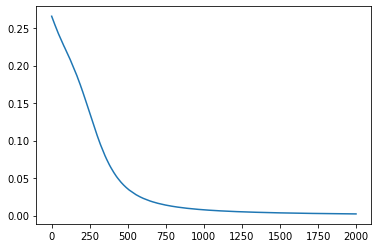

In [51]:
# XOR 네트워크의 loss 변화를 plot 그리기

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.show()